# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [217]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [220]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [1]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

NameError: name 'pd' is not defined

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [222]:
display(df_hh_income.shape)
display(df_pct_poverty.shape)
display(df_pct_completed_hs.shape)
display(df_share_race_city.shape)
display(df_fatalities.shape)

(29322, 3)

(29329, 3)

(29329, 3)

(29268, 7)

(2535, 14)

In [223]:
display(df_hh_income.columns)
display(df_pct_poverty.columns)
display(df_pct_completed_hs.columns)
display(df_share_race_city.columns)
display(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [224]:
display('df_hh_income')
display(df_hh_income.isna().sum())
display(df_hh_income.duplicated().sum())
display(print('\n'))

display(print('df_pct_poverty'))
display(df_pct_poverty.isna().sum())
display(df_pct_poverty.duplicated().sum())
display(print('\n'))

display(print('df_pct_completed_hs'))
display(df_pct_completed_hs.isna().sum())
display(df_pct_completed_hs.duplicated().sum())
display(print('\n'))

display(print('df_share_race_city'))
display(df_share_race_city.isna().sum())
display(df_share_race_city.duplicated().sum())
display(print('\n'))


display(print('df_fatalities'))
display(df_fatalities.isna().sum())
display(df_fatalities.duplicated().sum())



'df_hh_income'

Geographic Area     0
City                0
Median Income      51
dtype: int64

0

None

df_pct_poverty


None

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

0

None

df_pct_completed_hs


None

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

0

None

df_share_race_city


None

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

0

None

df_fatalities


None

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

0

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [225]:
display(df_hh_income.dropna(how='all'))
display(df_hh_income.drop_duplicates(inplace=True))

display(df_pct_poverty.dropna(how='all'))
display(df_pct_poverty.drop_duplicates(inplace=True))

display(df_pct_completed_hs.dropna(how='all'))
display(df_pct_completed_hs.drop_duplicates(inplace=True))

display(df_share_race_city.dropna(how='all'))
display(df_share_race_city.drop_duplicates(inplace=True))


display(df_fatalities.dropna(how='all'))
display(df_fatalities.drop_duplicates(inplace=True))


,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


None

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


None

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


None

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


None

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


None

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [226]:
df_pct_poverty[df_pct_poverty['poverty_rate'] == '-'] = '0.0'
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)
filter=df_pct_poverty['poverty_rate']>0
grouped=df_pct_poverty.groupby(['Geographic Area'])['poverty_rate'].mean()

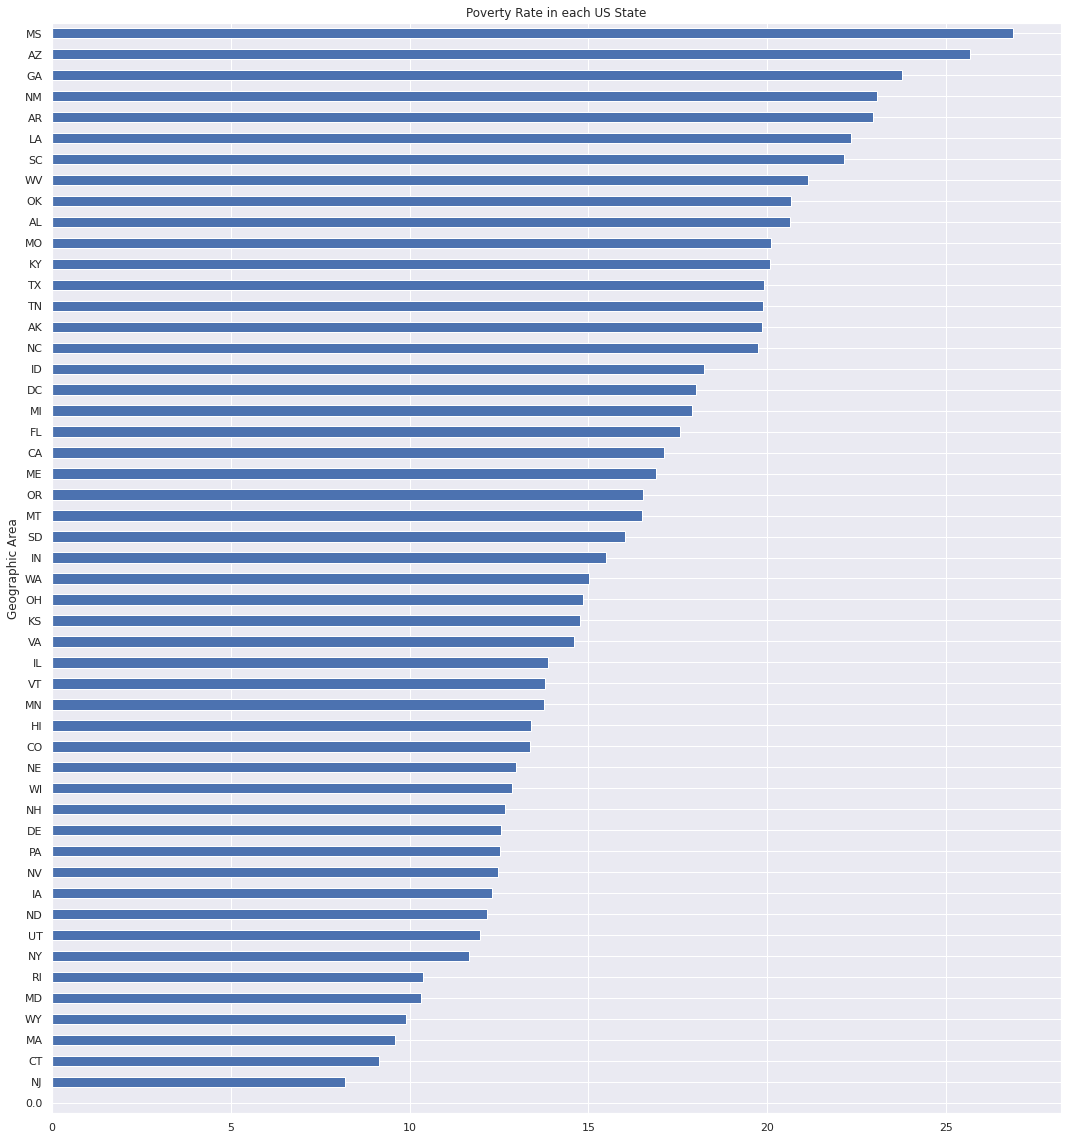

In [227]:
fig,ax=plt.subplots(figsize=(15,16))
grouped.sort_values().plot.barh(ax=ax)
plt.title("Poverty Rate in each US State")
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

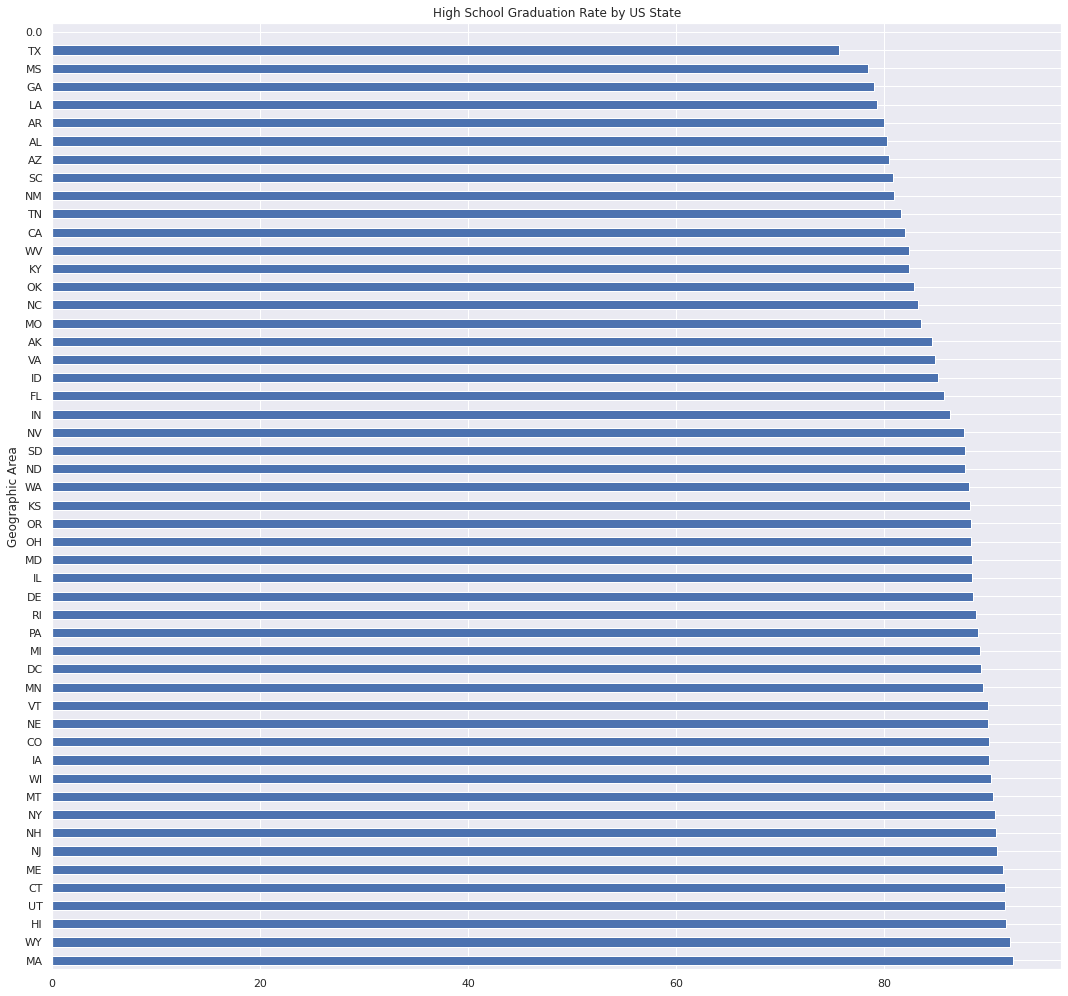

In [228]:
df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] == '-'] = '0.0'
df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] == '-']
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)
filter = df_pct_completed_hs['percent_completed_hs'] > 0
hs_grouped = df_pct_completed_hs.groupby(['Geographic Area'])['percent_completed_hs'].mean()

fig,ax=plt.subplots(figsize=(15,14))
hs_grouped.sort_values(ascending=False).plot.barh(ax=ax)
plt.title("High School Graduation Rate by US State")
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

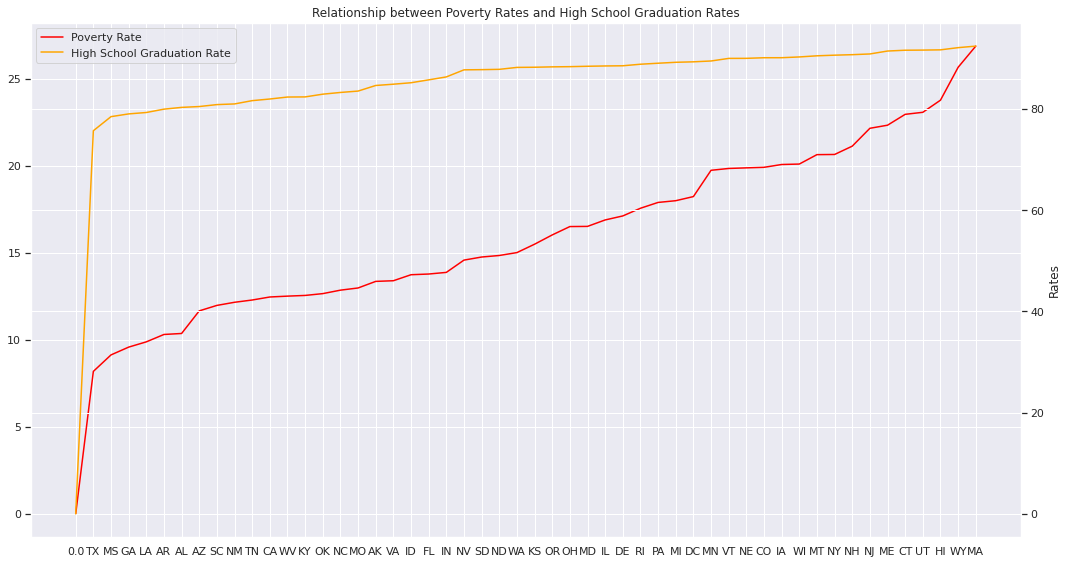

In [229]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
l1, = ax1.plot(grouped.sort_values(), color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(hs_grouped.sort_values(), color='orange')

plt.legend([l1, l2], ["Poverty Rate", "High School Graduation Rate"])
plt.xlabel('US State')
plt.ylabel('Rates')
plt.title("Relationship between Poverty Rates and High School Graduation Rates")
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

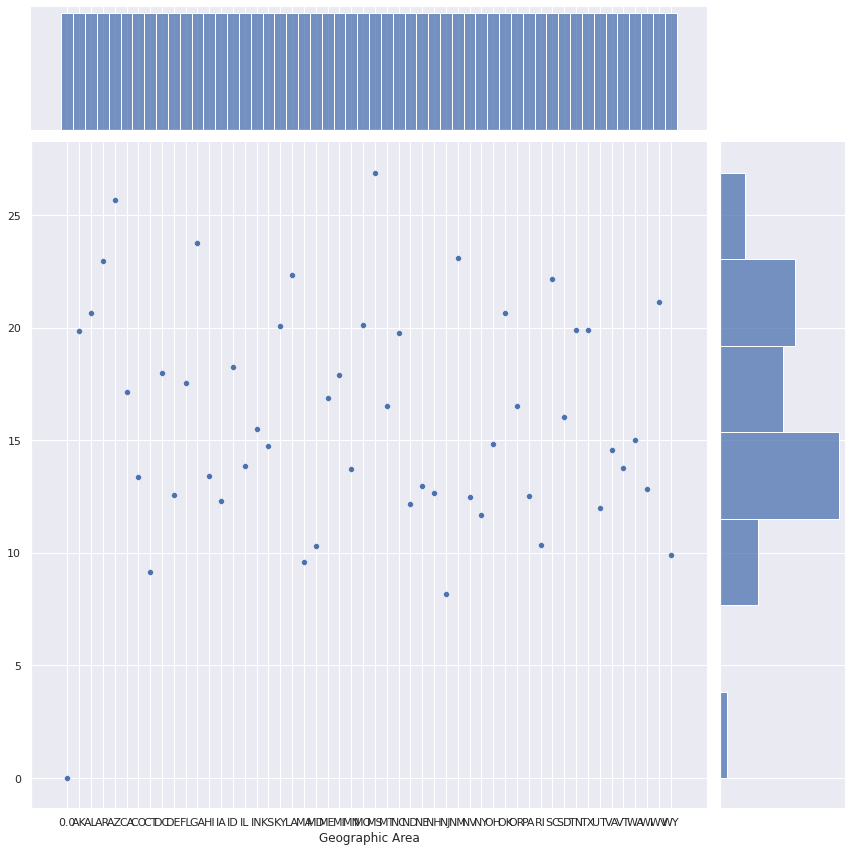

In [230]:
Poverty_Rates = sns.jointplot(x=grouped.index, y=grouped.values, height=12)


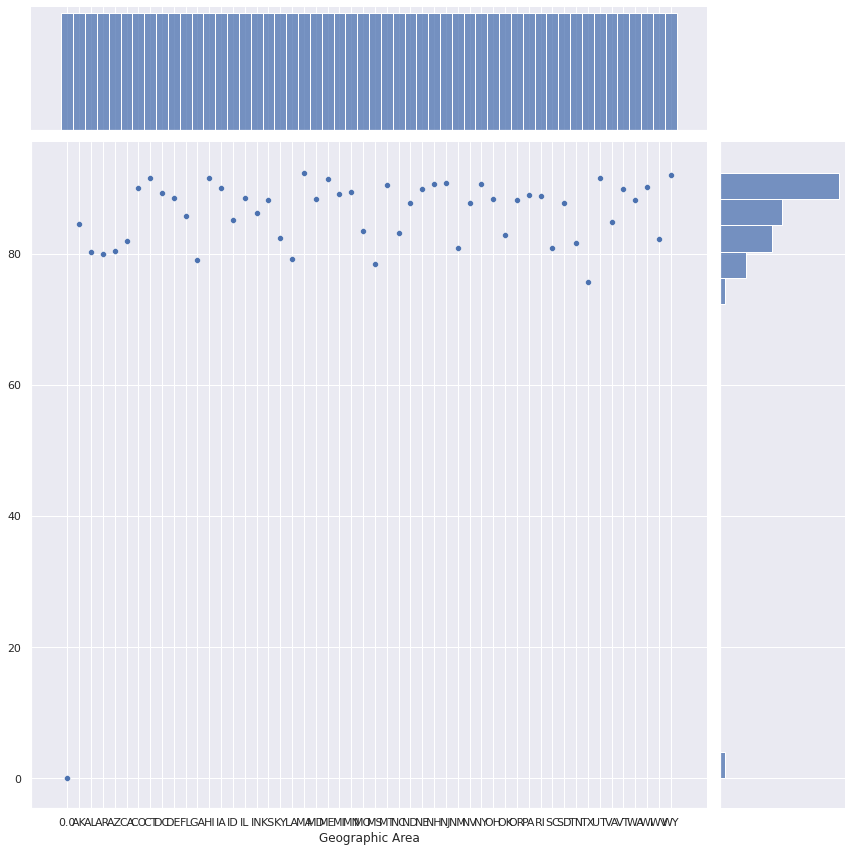

In [231]:
High_School_Graduation_Rates = sns.jointplot(x=hs_grouped.index, y=hs_grouped.values, height=12)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

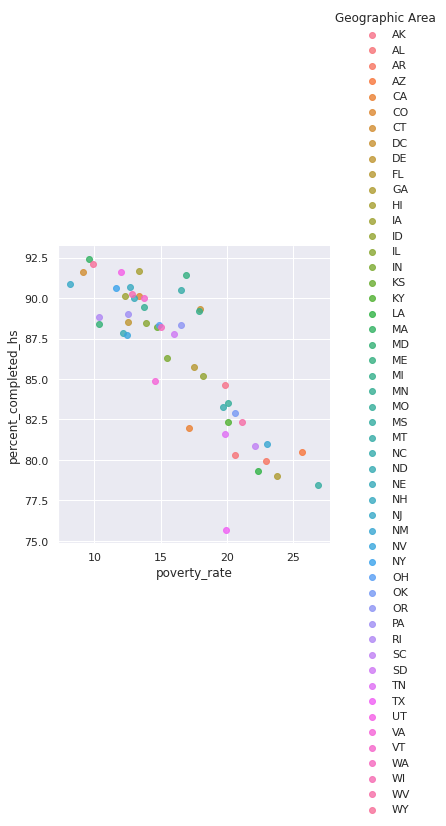

In [232]:
poverty_ratio = grouped
hs_graduation_ratio = hs_grouped

poverty_ratio_df = pd.DataFrame(poverty_ratio)
poverty_ratio_df =poverty_ratio_df.reset_index(level=[0,0])

hs_graduation_ratio_df = pd.DataFrame(hs_graduation_ratio)
hs_graduation_ratio_df = hs_graduation_ratio_df.reset_index(level=[0,0])
hs_graduation_ratio_df.iloc[0]

update =poverty_ratio_df.merge(hs_graduation_ratio_df, left_index=True, right_index=True)
ratio_df = update.drop(index=0, columns='Geographic Area_y')

ratio_df.rename(columns={'Geographic Area_x':'Geographic Area'}, inplace=True)

ratio_df

ax = sns.lmplot(x="poverty_rate", y="percent_completed_hs", data=ratio_df, hue="Geographic Area")



# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [233]:
# convert '(X)' values to '0.0'

df_share_race_city[df_share_race_city['share_white']== "(X)"] = '0.0'
df_share_race_city[df_share_race_city['share_black']== "(X)"] = '0.0'
df_share_race_city[df_share_race_city['share_native_american']== "(X)"] = '0.0'
df_share_race_city[df_share_race_city['share_asian']== "(X)"] = '0.0'

# convert str to float
df_share_race_city.iloc[: , 2:7 ] = df_share_race_city.iloc[: , 2:7 ].astype(float)

df = df_share_race_city.groupby('Geographic area').mean()
Racial_Makeup_df = pd.DataFrame(df)
Racial_Makeup_df = Racial_Makeup_df.reset_index(0,0)
Racial_Makeup_df = Racial_Makeup_df.drop(0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

In a future version of pandas all arguments of DataFrame.reset_index except for the argument 'level' will be keyword-only



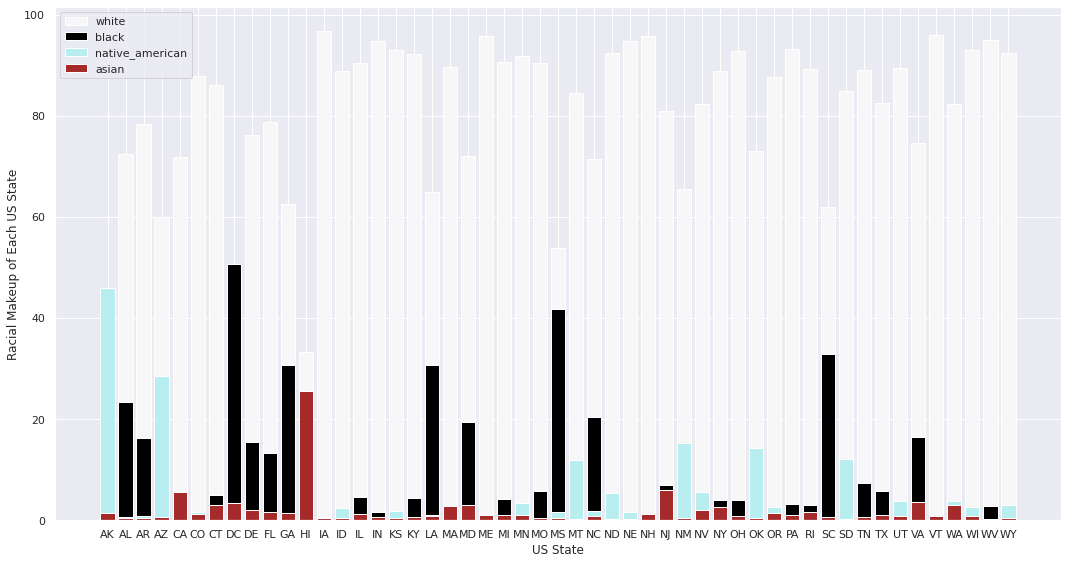

In [234]:
plt.bar(Racial_Makeup_df['Geographic area'], Racial_Makeup_df['share_white'], color='#f7f7f7')
plt.bar(Racial_Makeup_df['Geographic area'], Racial_Makeup_df['share_black'], color='black')
plt.bar(Racial_Makeup_df['Geographic area'], Racial_Makeup_df['share_native_american'], color='#b9eef0')
plt.bar(Racial_Makeup_df['Geographic area'], Racial_Makeup_df['share_asian'], color='brown')
plt.xticks(Racial_Makeup_df['Geographic area'])
plt.xlabel("US State")
plt.ylabel("Racial Makeup of Each US State")
plt.legend(["white", "black", "native_american", "asian"])
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [235]:
People_Killed_By_Race =df_fatalities['race'].value_counts()

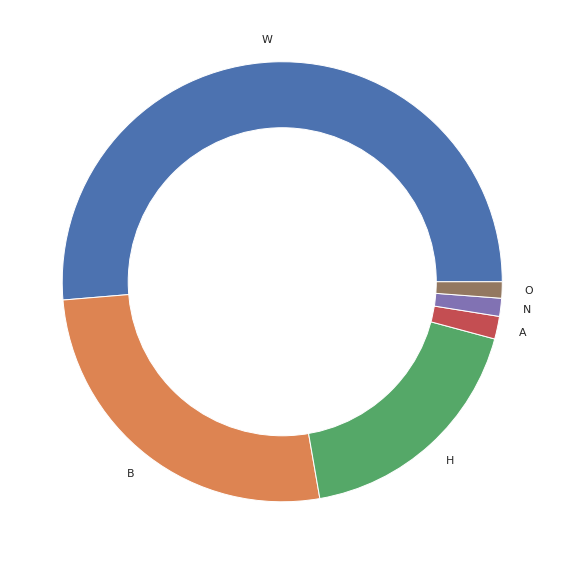

In [236]:
plt.pie(People_Killed_By_Race, labels=People_Killed_By_Race.index)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [237]:
x = df_fatalities['gender'].value_counts()

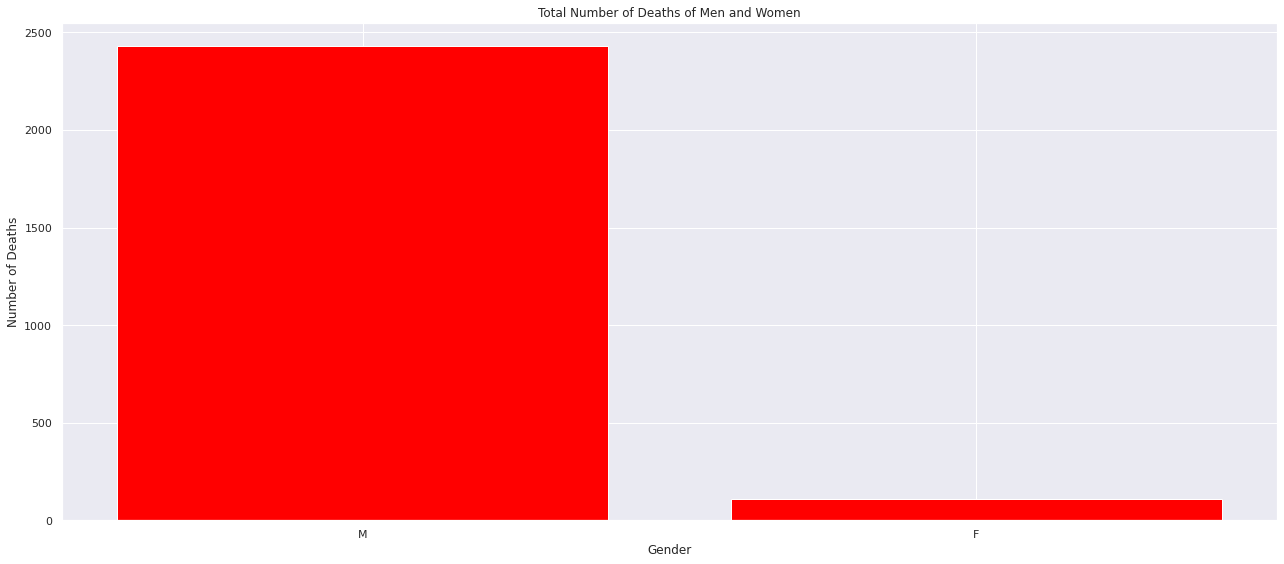

In [238]:
plt.figure(figsize=(18,8))
plt.bar(x.index, x, color ='red')
plt.xticks(x.index)
plt.xlabel("Gender")
plt.ylabel("Number of Deaths")
plt.title("Total Number of Deaths of Men and Women")
plt.show()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [239]:
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False


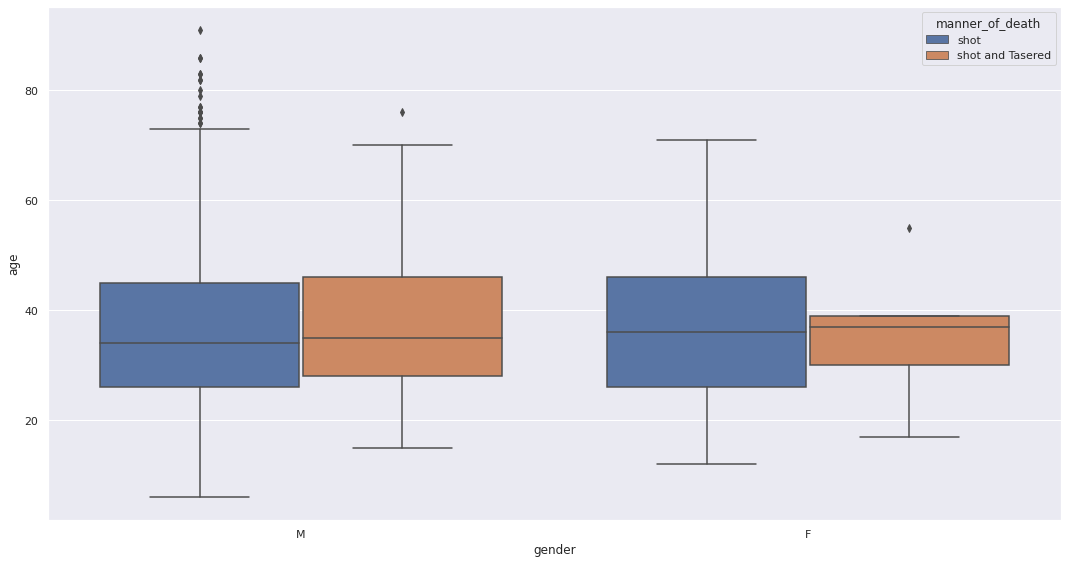

In [240]:
ax = sns.boxplot(x="gender", y="age", hue="manner_of_death",
                 data=df_fatalities)

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [241]:
unarmed = df_fatalities[df_fatalities['armed'] == 'unarmed']
armed = df_fatalities[df_fatalities['armed'] != 'unarmed']

armed_percentage = (len(armed) / len(df_fatalities) ) * 100
unarmed_percentage = (len(unarmed) / len(df_fatalities) ) * 100

print(f"{round(armed_percentage, 2)}% percentage of police killings were people armed")
print(f"{round(unarmed_percentage, 2)}% percentage of police killings were people unarmed")



93.25% percentage of police killings were people armed
6.75% percentage of police killings were people unarmed


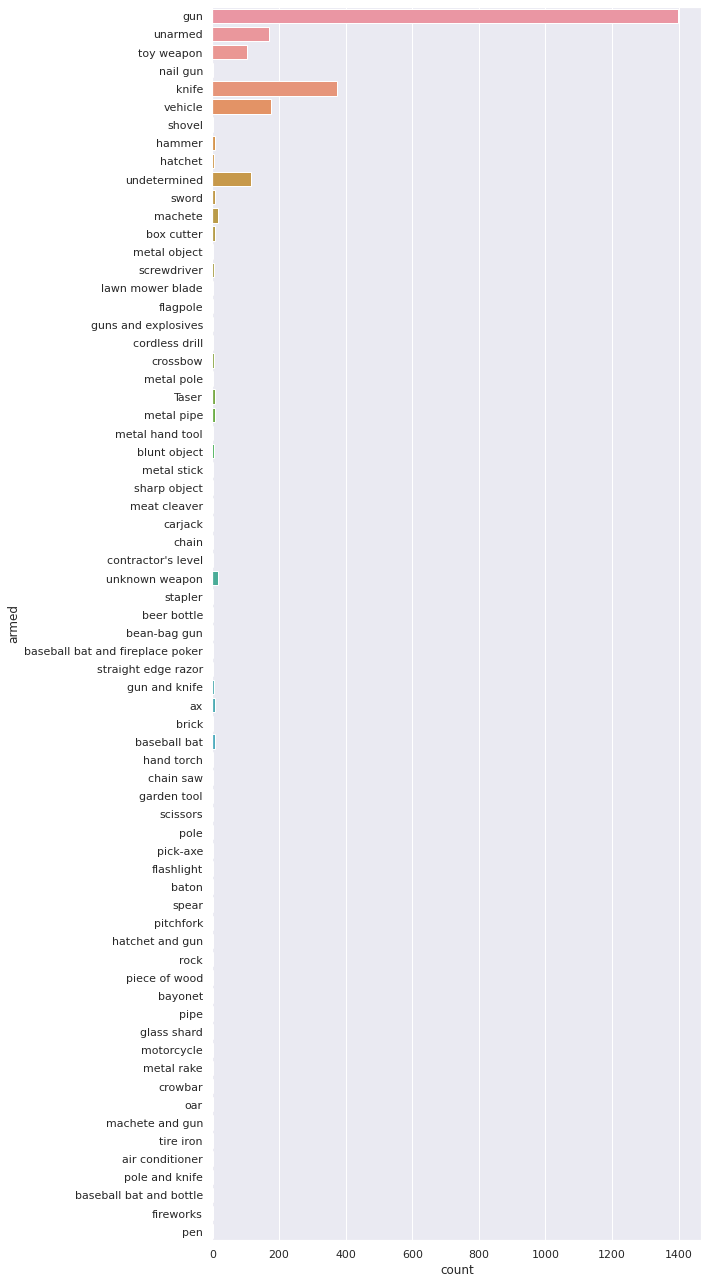

In [242]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,18))
ax = sns.countplot(y='armed', data=df_fatalities)


In [243]:
with_guns = armed[armed['armed']== 'gun']['armed'].count()
without_armed = unarmed['armed'].count()

print(f"{with_guns} of the people killed by police were armed with guns ")
print(f"{without_armed} of the people killed by police were unarmed")


1398 of the people killed by police were armed with guns 
171 of the people killed by police were unarmed


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [244]:
under_25 = df_fatalities[df_fatalities['age'] < 25 ]
percentage_25_years_old  = (len(under_25) / len(df_fatalities)) * 100

print(f"{round(percentage_25_years_old, 2)}% percentage of people killed were under 25 years old")

17.75% percentage of people killed were under 25 years old


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

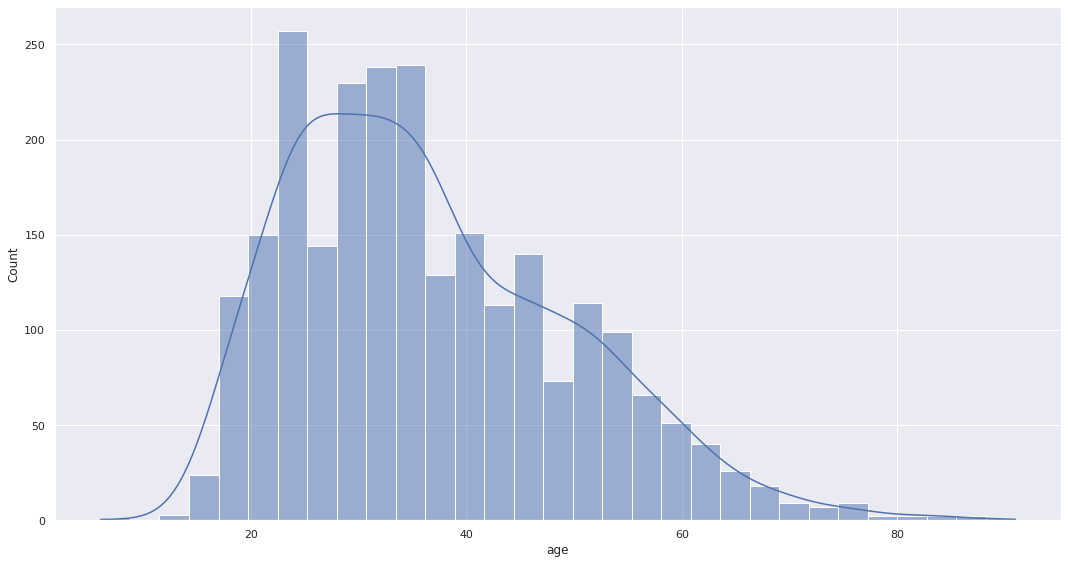

In [245]:
sns.histplot(data=df_fatalities, x="age", kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

Text(0.5, 1.0, 'Age distribution, by race')

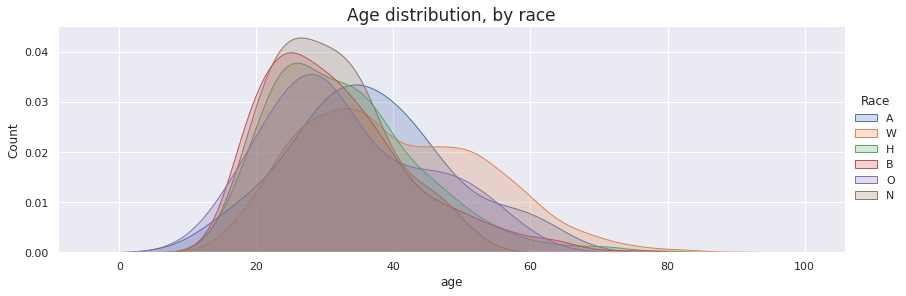

In [246]:
g = sns.FacetGrid(data=df_fatalities, hue="race", aspect=3, height=4)
g.map(sns.kdeplot, "age", shade=True)
g.add_legend(title="Race")


g.set_ylabels("Count")
plt.title("Age distribution, by race", fontsize=17)

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [247]:
df_fatalities.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False


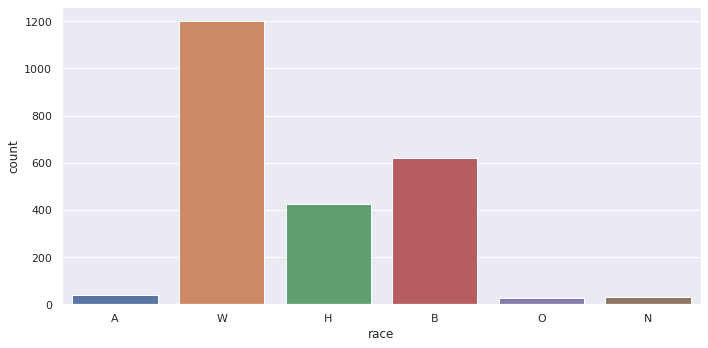

In [248]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(x='race', data=df_fatalities)

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [249]:
diagnosed_with_mi=  df_fatalities[df_fatalities['signs_of_mental_illness'] == True]
percentage_of_killings  = (len(diagnosed_with_mi) / len(df_fatalities)) * 100

In [250]:
print(f"{round(percentage_of_killings, 2)} of people killed by police have been diagnosed with a mental illness")

24.97 of people killed by police have been diagnosed with a mental illness


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

Text(0.5, 1.0, 'Most dangerous cities')

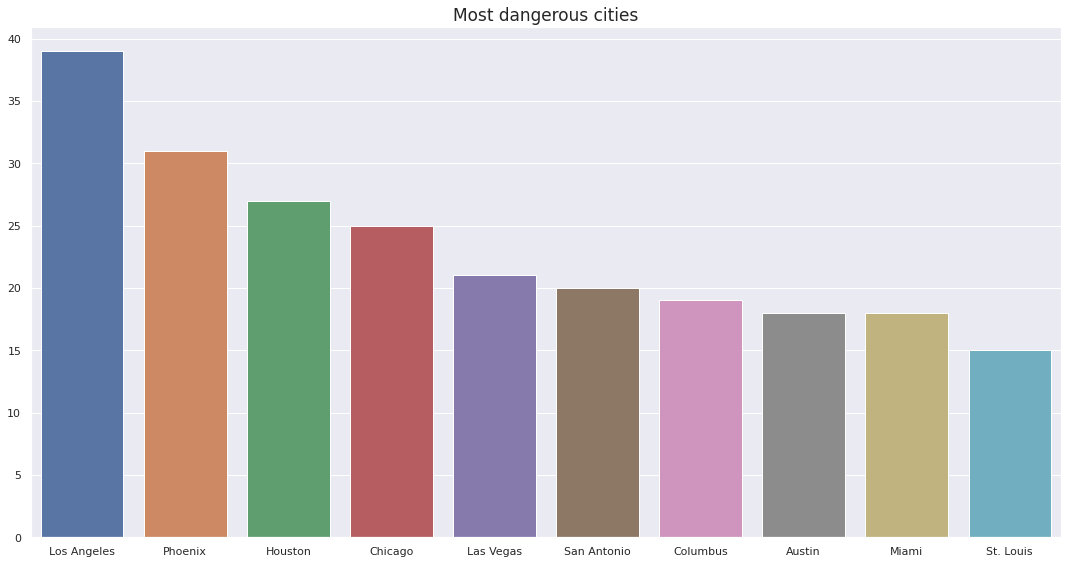

In [251]:
# method 1 
#Easy method 
 
cities =  df_fatalities.city.value_counts().head(10)
cities.index

plt.figure(figsize=(15,8))
sns.barplot(x=cities.index, y=cities.values)
plt.title("Most dangerous cities", fontsize=17)

In [252]:

# method 2 
# df_fatalities.groupby('city')['city'].count().sort_values(ascending=False).head(10)

# method 3
# df_city = df.filter(["city"], axis=1)
# df_city
# df_city["count"] = 1
# df_city

# grouped_city = df_city.groupby("city", as_index=False,sort=False).sum()
# grouped_city.sort_index(ascending=False)


# grouped_city = grouped_city.sort_values("count", ascending=False).head(10)
# grouped_city                                                      

# plt.figure(figsize=(15,8))
# sns.barplot(data=grouped_city, x="city", y="count")
# plt.title("Most dangerous cities", fontsize=17)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [253]:
df_fatalities.groupby(['race'])['city'].value_counts(ascending=False)

top_cites = df_fatalities.groupby('city')['city'].count().sort_values(ascending=False).head(10)

top_city_race_df = pd.DataFrame(data={"city": "test",
                         "race": "test","death":0}, index=[0])

city = [ city for city in top_cites.index]
for i in city:
    filter_city_df = df_fatalities[df_fatalities['city'] == i]
    grouped = filter_city_df.groupby(['city'])['race'].value_counts()
    df = pd.DataFrame(grouped)
    df.rename(columns = {'race':'death'}, inplace = True)
    df.reset_index(inplace = True)
    top_city_race_df= top_city_race_df.append(df, ignore_index=True)

top_city_race_df.drop(0,0, inplace=True)

top_city_race_df.tail(20)
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,city,race,death
14,Chicago,B,21
15,Chicago,W,2
16,Chicago,H,1
17,Las Vegas,W,9
18,Las Vegas,H,5
19,Las Vegas,B,3
20,San Antonio,H,12
21,San Antonio,B,3
22,San Antonio,W,3
23,Columbus,B,11


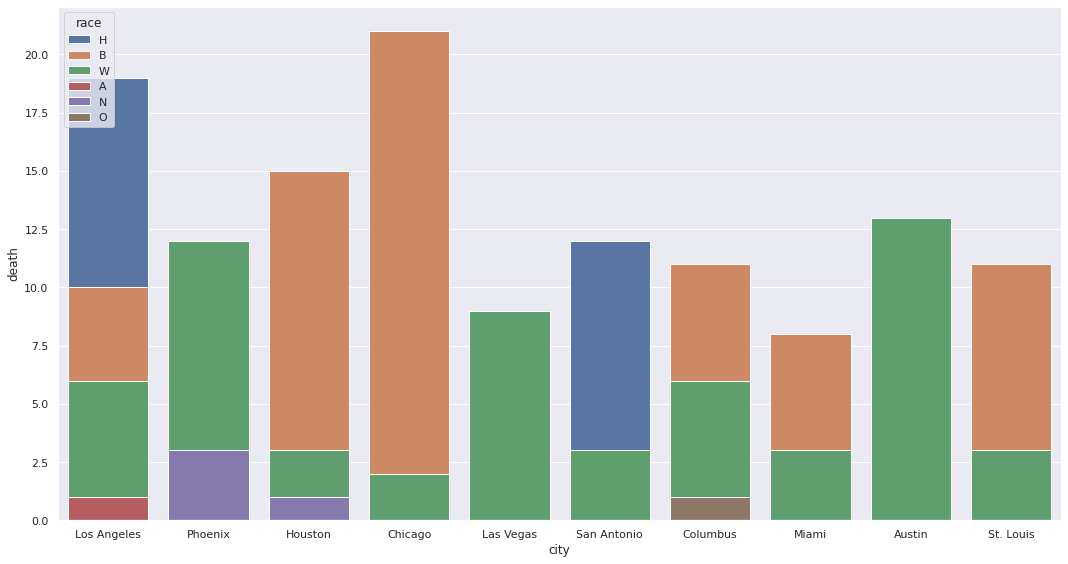

In [254]:
ax = sns.barplot(x="city", y="death", hue="race", dodge=False, data=top_city_race_df)



# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
state = df_fatalities['state'].value_counts()
state

In [256]:
fig = px.choropleth(df_fatalities, locations=state.index, locationmode="USA-states", color=state.values, labels={'color':'Police Killings'}, title='Police Killings by US States', scope="usa")
fig.show()




# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities['year'] = df_fatalities['date'].dt.year


In [266]:
Killings_Over_Time = df_fatalities.groupby('year')['gender'].count()

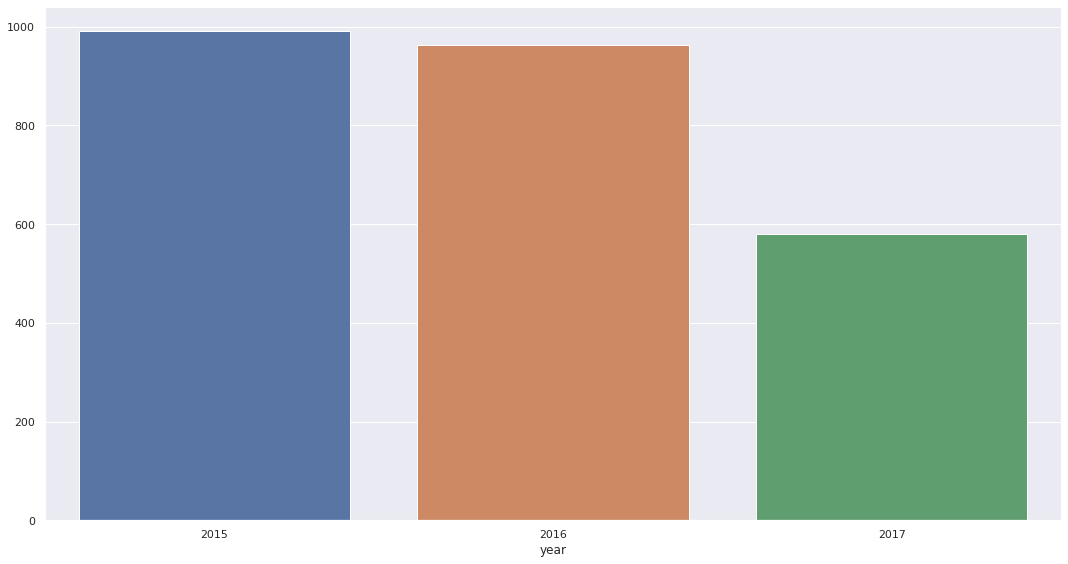

In [272]:
ax = sns.barplot(x=Killings_Over_Time.index, y=Killings_Over_Time.values)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).